# Importacion de librerías

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Creación de dataframe

In [8]:
data = pd.read_excel(r'git_tripleten\tukan_notebook\DATA\BrainTeaser Data.xlsx', sheet_name="DATA")

print(data.head())
print(data.info())
print(data.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'git_tripleten\\tukan_notebook\\DATA\\BrainTeaser Data.xlsx'

# Limpieza de datos

In [ ]:
# Rename columns to all lower case and replace spaces with underscores, also strip whitespace
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns = data.columns.str.strip()

# Rename specific columns
data.rename(columns={
    'costo_anual_total_(cat)': 'cat'    
}, inplace=True)
print(data.columns)

Index(['date', 'client_type', 'credit_card_type', 'institutions',
       'número_de_tarjetas_de_crédito', 'saldo_total',
       'límite_de_crédito_promedio',
       'saldo_de_promociones_a_meses_sin_intereses', 'cat'],
      dtype='object')


In [ ]:
# Convert 'client_type' to categorical Totalero = 1, No Totalero = 0
print(data['client_type'].value_counts())
encoder = OrdinalEncoder()
data['client_type'] = encoder.fit_transform(data[['client_type']])
print(data.head())
print(data['client_type'].value_counts())

client_type
Totalero       1656
No totalero    1629
Name: count, dtype: int64
        date  client_type credit_card_type institutions  \
0  28/2/2019          1.0              Oro      Banorte   
1  28/2/2019          1.0          Platino      Banorte   
2  28/2/2019          1.0          Clásica      Banorte   
3  28/2/2019          1.0           Básica      Banorte   
4  28/2/2019          0.0              Oro      Banorte   

   número_de_tarjetas_de_crédito  saldo_total  límite_de_crédito_promedio  \
0                         297452   2600000000                    67647.56   
1                          66303   1570000000                   185802.80   
2                         293211   1150000000                    32326.82   
3                           1621      1521711                     5168.31   
4                         444842  15000000000                    56718.88   

   saldo_de_promociones_a_meses_sin_intereses     cat  
0                                1.510000e+09  0

In [ ]:
# Saldo_de_promociones_a_meses_sin_intereses to numeric 
data['saldo_de_promociones_a_meses_sin_intereses'] = pd.to_numeric(data['saldo_de_promociones_a_meses_sin_intereses'], errors='coerce')
#print(data['saldo_de_promociones_a_meses_sin_intereses'].dtype)

In [ ]:
# date to date type
data['date'] = pd.to_datetime(data['date'], errors='coerce')
#print(data['date'].head())

C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\3879751340.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


# Insights 

### Número de clientes por institución (Tarjetas de crédito por Institución)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        3285 non-null   datetime64[ns]
 1   client_type                                 3285 non-null   float64       
 2   credit_card_type                            3285 non-null   object        
 3   institutions                                3285 non-null   object        
 4   número_de_tarjetas_de_crédito               3285 non-null   int64         
 5   saldo_total                                 3285 non-null   int64         
 6   límite_de_crédito_promedio                  3285 non-null   float64       
 7   saldo_de_promociones_a_meses_sin_intereses  3285 non-null   float64       
 8   cat                                         3245 non-null   float64       
dtypes: dateti

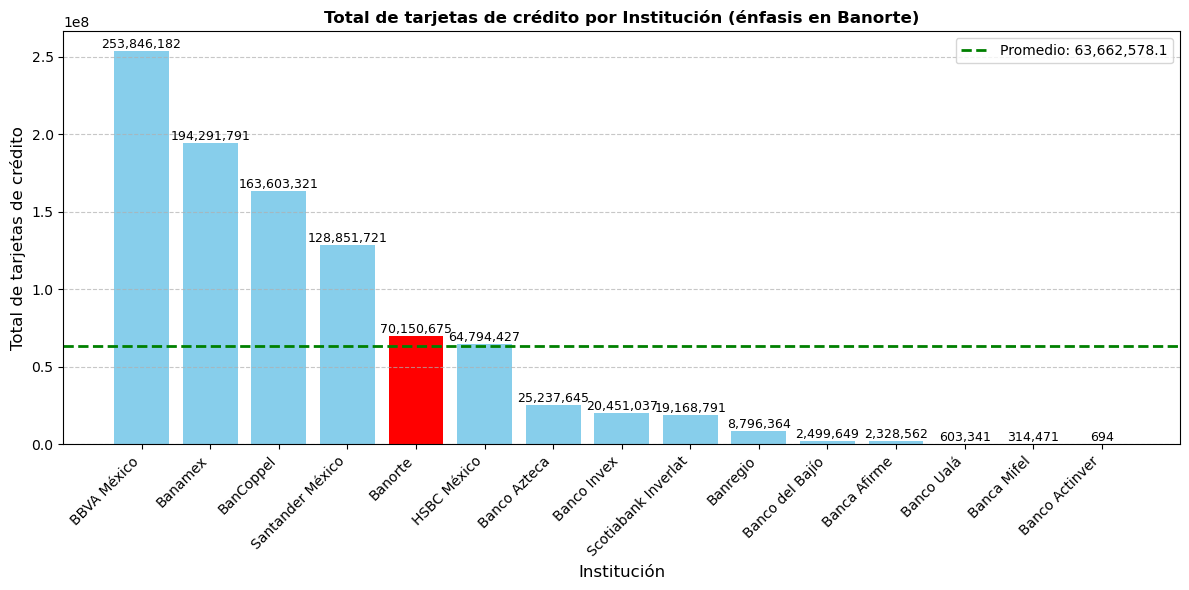

Top 10 instituciones con más tarjetas de crédito:
0            BBVA México
1                Banamex
2              BanCoppel
3       Santander México
4                Banorte
5            HSBC México
6           Banco Azteca
7            Banco Invex
8    Scotiabank Inverlat
9               Banregio
Name: institutions, dtype: object
Total de tarjetas de crédito : 954,938,671


In [ ]:
print(data.info())

grouped_data = data.groupby(['institutions', 'credit_card_type'])['número_de_tarjetas_de_crédito'].sum().reset_index() # Grouping by institutions and credit card type, summing the number of credit cards
grouped_data = grouped_data.sort_values(by='institutions', ascending=False)  # Sorting by the number of credit cards in descending order

# Summarize the number of credit cards by institution in another dataframe 
cards_by_bank = grouped_data.groupby('institutions')['número_de_tarjetas_de_crédito'].sum().reset_index()
cards_by_bank = cards_by_bank.sort_values(by='número_de_tarjetas_de_crédito', ascending=False)  # Sorting by the number of credit cards in descending order

# To display the result
print(cards_by_bank)
##########################
# Plotting the total number of credit cards by institution

# Create a list of colors (red for Banorte, skyblue for others)
mean_value = cards_by_bank['número_de_tarjetas_de_crédito'].mean()

# Create a list of colors (red for Banorte, skyblue for others)
colors = ['red' if inst == 'Banorte' else 'skyblue' for inst in cards_by_bank['institutions']]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(
    cards_by_bank['institutions'],  
    cards_by_bank['número_de_tarjetas_de_crédito'],
    color=colors
)

# Add value labels on top of bars (with comma formatting)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.5,  
        f'{height:,.0f}',  # Format with commas (e.g., 1,234 instead of 1234)
        ha='center',  
        va='bottom',
        fontsize=9
    )

# Add a horizontal line for the mean
plt.axhline(
    y=mean_value, 
    color='green', 
    linestyle='--', 
    linewidth=2, 
    label=f'Promedio: {mean_value:,.1f}'  # Also format mean value with commas
)

# Customize the plot
plt.title('Total de tarjetas de crédito por Institución (énfasis en Banorte)', fontweight='bold')
plt.xlabel('Institución', fontsize=12)
plt.ylabel('Total de tarjetas de crédito', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()  # Show the mean line label

plt.tight_layout()
plt.show()
###########################
# Select top 10 institutions with the most credit cards
top_10_institutions = cards_by_bank.head(10)['institutions'].reset_index(drop=True)
print('Top 10 instituciones con más tarjetas de crédito:')
print(top_10_institutions)

# Total of número_de_tarjetas_de_crédito for top 10 institutions
total_top_10 = cards_by_bank['número_de_tarjetas_de_crédito'].sum()
print(f'Total de tarjetas de crédito : {total_top_10:,.0f}')

## Qué tipo de clientes tiene cada banco

In [ ]:
# Summarize the number of credit cards by type of client and institution in another dataframe 
cards_by_client_type = data.groupby(['institutions', 'client_type'])['número_de_tarjetas_de_crédito'].sum().reset_index()
cards_by_client_type = cards_by_client_type.sort_values(by=['institutions', 'client_type'], ascending=[False, False])  # Sorting by the number of credit cards in descending order

# Filter for top_10_institutions and order by top_10_institutions
filtered_cards_by_client_type = cards_by_client_type[cards_by_client_type['institutions'].isin(top_10_institutions)]
#print(filtered_cards_by_client_type)

# Ensure 'institutions' follows the order in top_10_institutions
filtered_cards_by_client_type['institutions'] = pd.Categorical( # Convert to categorical type
    filtered_cards_by_client_type['institutions'],
    categories=top_10_institutions,  # Your predefined order
    ordered=True
)

# Sort the DataFrame to match the custom order
filtered_cards_by_client_type = filtered_cards_by_client_type.sort_values('institutions')

# Verify the order
print(filtered_cards_by_client_type) 



           institutions  client_type  número_de_tarjetas_de_crédito
0           BBVA México          0.0                      103564847
1           BBVA México          1.0                      150281335
4               Banamex          0.0                       69627530
5               Banamex          1.0                      124664261
2             BanCoppel          0.0                       47922969
3             BanCoppel          1.0                      115680352
26     Santander México          1.0                       85503294
25     Santander México          0.0                       43348427
19              Banorte          0.0                       34539868
20              Banorte          1.0                       35610807
23          HSBC México          0.0                       21204068
24          HSBC México          1.0                       43590359
12         Banco Azteca          1.0                       17507984
11         Banco Azteca          0.0            

C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\3509377941.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cards_by_client_type['institutions'] = pd.Categorical( # Convert to categorical type


In [ ]:
# Calculate the difference in the number of credit cards between Totalero and No Totalero in another DataFrame
diff_cards = filtered_cards_by_client_type.pivot(index='institutions', columns='client_type', values='número_de_tarjetas_de_crédito').fillna(0)
diff_cards.columns = ['No Totalero', 'Totalero']
diff_cards['difference'] = diff_cards['Totalero'] - diff_cards['No Totalero']
print(diff_cards)
print('Varianza:')
print(diff_cards.var())
# Ad total cards to diff_cards dataframe
diff_cards['total_cards'] = diff_cards['Totalero'] + diff_cards['No Totalero']
# Calculate percentages and add them to diff_cards dataframe
diff_cards['No Totalero %'] = (diff_cards['No Totalero'] / diff_cards['total_cards'] * 100).round(2).fillna(0)
diff_cards['Totalero %'] = (diff_cards['Totalero'] / diff_cards['total_cards'] * 100).round(2).fillna(0)
# Reorder columns
diff_cards = diff_cards[['No Totalero', 'No Totalero %', 'Totalero', 'Totalero %', 'difference', 'total_cards']]
print(diff_cards.info())
display(diff_cards)
print(diff_cards.describe())

                     No Totalero   Totalero  difference
institutions                                           
BBVA México            103564847  150281335    46716488
Banamex                 69627530  124664261    55036731
BanCoppel               47922969  115680352    67757383
Santander México        43348427   85503294    42154867
Banorte                 34539868   35610807     1070939
HSBC México             21204068   43590359    22386291
Banco Azteca             7729661   17507984     9778323
Banco Invex              6910751   13540286     6629535
Scotiabank Inverlat      7910687   11258104     3347417
Banregio                 2613160    6183204     3570044
Varianza:
No Totalero    1.071191e+15
Totalero       2.909072e+15
difference     6.184266e+14
dtype: float64
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, BBVA México to Banregio
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No

,No Totalero,No Totalero %,Totalero,Totalero %,difference,total_cards
institutions,,,,,,
BBVA México,103564847,40.80,150281335,59.20,46716488,253846182
Banamex,69627530,35.84,124664261,64.16,55036731,194291791
BanCoppel,47922969,29.29,115680352,70.71,67757383,163603321
Santander México,43348427,33.64,85503294,66.36,42154867,128851721
Banorte,34539868,49.24,35610807,50.76,1070939,70150675
HSBC México,21204068,32.73,43590359,67.27,22386291,64794427
Banco Azteca,7729661,30.63,17507984,69.37,9778323,25237645
Banco Invex,6910751,33.79,13540286,66.21,6629535,20451037
Scotiabank Inverlat,7910687,41.27,11258104,58.73,3347417,19168791


        No Totalero  No Totalero %      Totalero  Totalero %    difference  \
count  1.000000e+01      10.000000  1.000000e+01   10.000000  1.000000e+01   
mean   3.453720e+07      35.694000  6.038200e+07   64.306000  2.584480e+07   
std    3.272905e+07       6.322547  5.393582e+07    6.322547  2.486819e+07   
min    2.613160e+06      29.290000  6.183204e+06   50.760000  1.070939e+06   
25%    7.774918e+06      31.155000  1.453221e+07   60.440000  4.334917e+06   
50%    2.787197e+07      33.715000  3.960058e+07   66.285000  1.608231e+07   
75%    4.677933e+07      39.560000  1.081361e+08   68.845000  4.557608e+07   
max    1.035648e+08      49.240000  1.502813e+08   70.710000  6.775738e+07   

        total_cards  
count  1.000000e+01  
mean   9.491920e+07  
std    8.568605e+07  
min    8.796364e+06  
25%    2.164769e+07  
50%    6.747255e+07  
75%    1.549154e+08  
max    2.538462e+08  


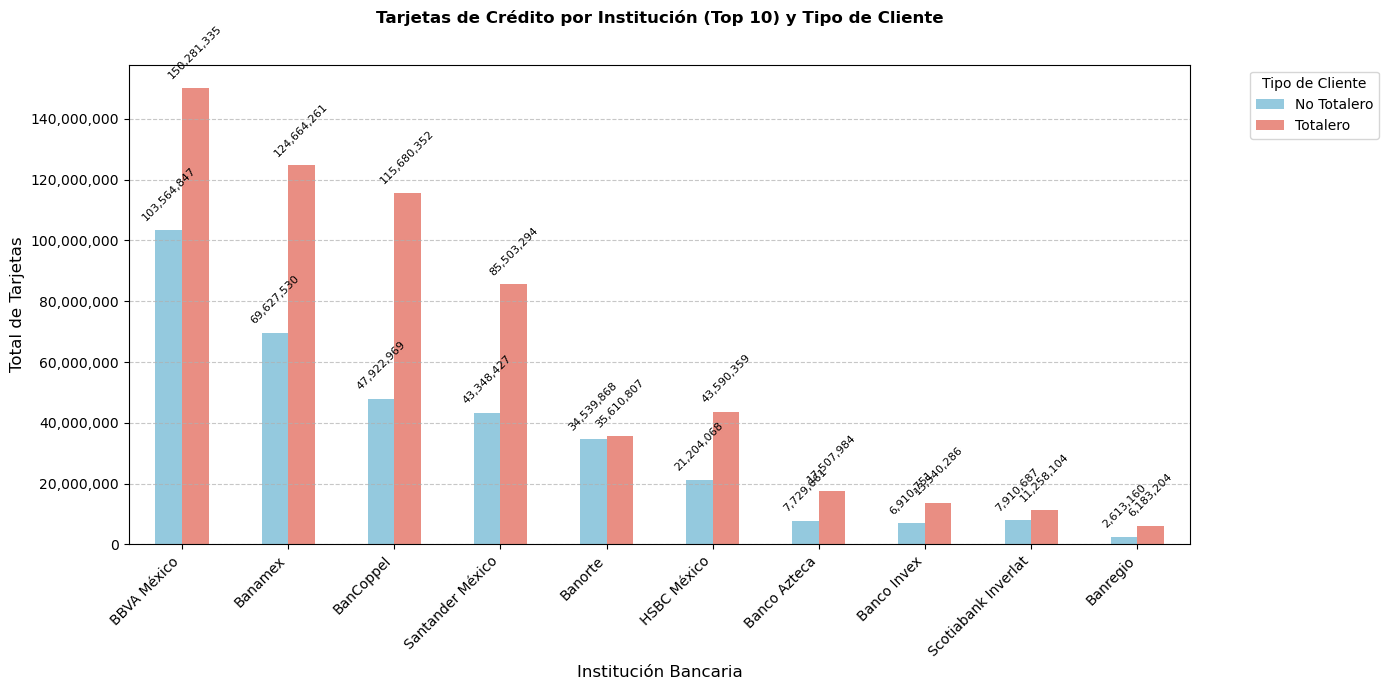

In [ ]:
# Graphic
filtered_cards_by_client_type['client_type'] = filtered_cards_by_client_type['client_type'].map(
    {0.0: 'No Totalero', 1.0: 'Totalero'}
)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=filtered_cards_by_client_type,
    x='institutions',
    y='número_de_tarjetas_de_crédito',
    hue='client_type',
    order=top_10_institutions,
    palette={'No Totalero': 'skyblue', 'Totalero': 'salmon'},
    width=0.5  # Keep the thinner bars
)

# Format y-axis with commas
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Add value labels on top of bars (rotated 45 degrees)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=45,
            xytext=(0, 5),
            textcoords='offset points'
        )

# Keep original institution labels (rotated 45 degrees)
plt.xticks(rotation=45, ha='right')

# Adjust plot aesthetics
plt.title('Tarjetas de Crédito por Institución (Top 10) y Tipo de Cliente', fontweight='bold', pad=30)
plt.xlabel('Institución Bancaria', fontsize=12)
plt.ylabel('Total de Tarjetas', fontsize=12)
plt.legend(title='Tipo de Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

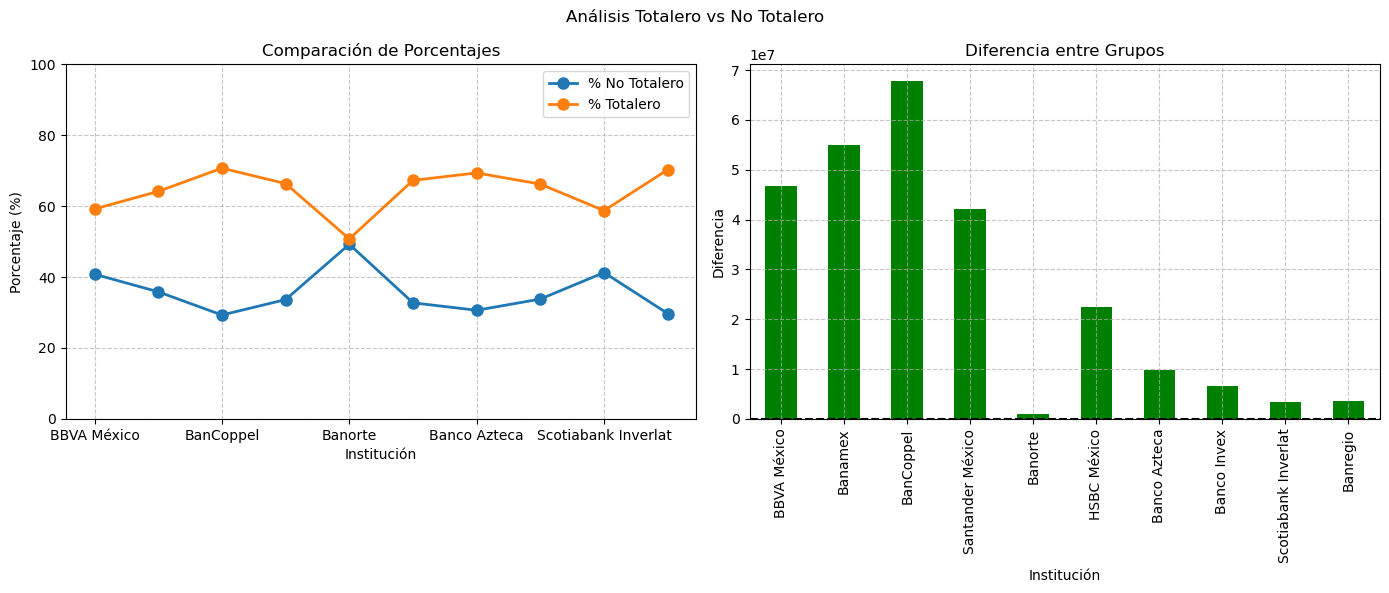

No Totalero      3.453720e+07
No Totalero %    3.569400e+01
Totalero         6.038200e+07
Totalero %       6.430600e+01
difference       2.584480e+07
total_cards      9.491920e+07
dtype: float64

In [ ]:
# Crear figura con dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis Totalero vs No Totalero')

# Gráfico: Comparación de porcentajes
diff_cards[['No Totalero %', 'Totalero %']].plot(
    kind='line', 
    ax=ax1, 
    marker='o',
    markersize=8,
    linewidth=2
)
ax1.set_title('Comparación de Porcentajes')
ax1.set_ylabel('Porcentaje (%)')
ax1.set_xlabel('Institución')
ax1.set_ylim(0, 100)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(['% No Totalero', '% Totalero'])

# Gráfico: Diferencia
diff_cards['difference'].plot(
    kind='bar', 
    ax=ax2, 
    color=['green' if x >= 0 else 'red' for x in diff_cards['difference']]
)
ax2.set_title('Diferencia entre Grupos')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_ylabel('Diferencia')
ax2.set_xlabel('Institución')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
display(diff_cards.mean())

El promedio de diferencia entre usuarios No Totaleros y Totaleros es de 25,844,801.8 y la diferencia de Banorte es 1,070,939. Indica un equilibrio entre ambos tipos de clientes.

### Se comparan los primeros 5 bancos.  

In [ ]:
# Group by institution, credit_card_type, and client_type and sum each entry
print(data.info()) # data check


grouped_data = data.groupby(
    ['institutions', 'credit_card_type', 'client_type']
).sum(numeric_only=True).reset_index()

# Display the grouped data
print(grouped_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        3285 non-null   datetime64[ns]
 1   client_type                                 3285 non-null   float64       
 2   credit_card_type                            3285 non-null   object        
 3   institutions                                3285 non-null   object        
 4   número_de_tarjetas_de_crédito               3285 non-null   int64         
 5   saldo_total                                 3285 non-null   int64         
 6   límite_de_crédito_promedio                  3285 non-null   float64       
 7   saldo_de_promociones_a_meses_sin_intereses  3285 non-null   float64       
 8   cat                                         3245 non-null   float64       
dtypes: dateti

C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\1436413887.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = filtered_grouped.pivot_table(
C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\1436413887.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


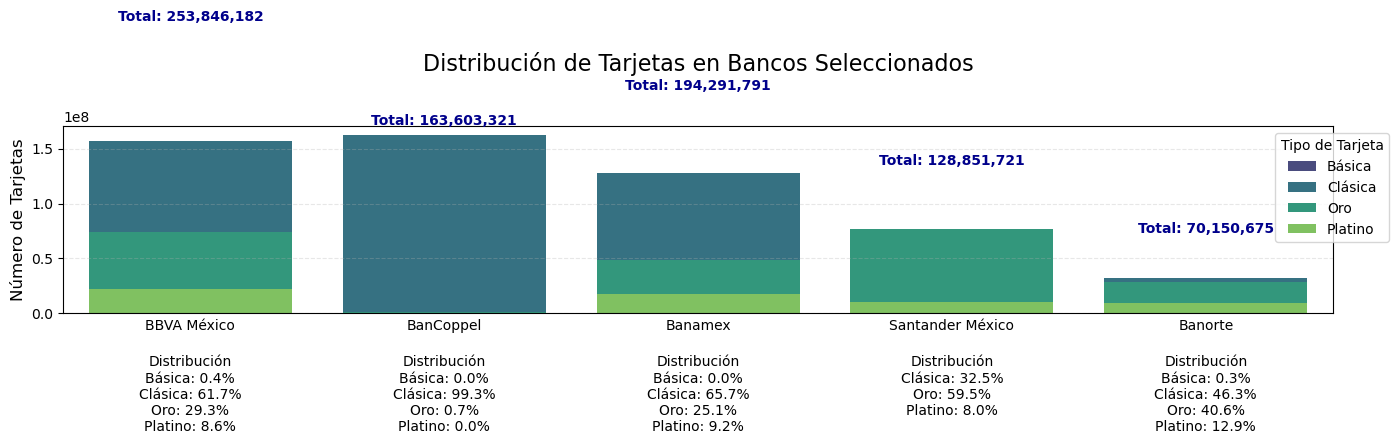

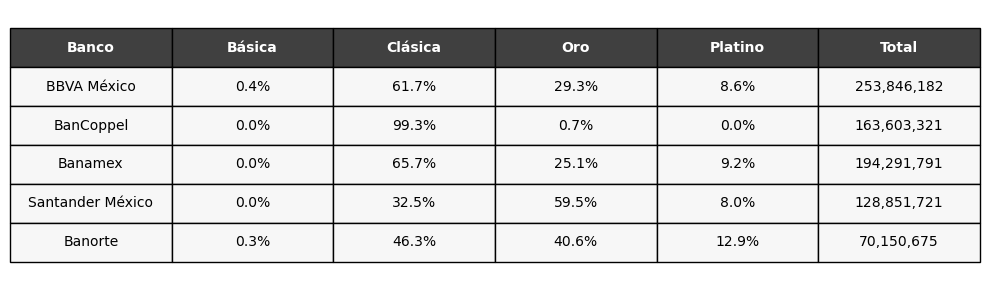

In [ ]:
# Filter and prepare data - KEEP THE ORIGINAL ORDER
selected_banks = ['BBVA México','BanCoppel', 'Banamex', 'Santander México','Banorte']
filtered_grouped = grouped_data[grouped_data['institutions'].isin(selected_banks)].copy()

# Convert institutions to categorical with specified order
filtered_grouped['institutions'] = pd.Categorical(
    filtered_grouped['institutions'],
    categories=selected_banks,
    ordered=True
)

# Now proceed with the rest exactly as before
pivot_data = filtered_grouped.pivot_table(
    index='institutions',
    columns='credit_card_type',
    values='número_de_tarjetas_de_crédito',
    aggfunc='sum',
    fill_value=0
)

# The rest of your code remains EXACTLY THE SAME from here...
total_cards = pivot_data.sum(axis=1)
percentages = pivot_data.div(total_cards, axis=0) * 100

# Create figure for the main plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Main bar plot
plot_data = pivot_data.reset_index().melt(id_vars='institutions', var_name='Tipo de Tarjeta', value_name='Cantidad')
sns.barplot(
    data=plot_data,
    x='institutions',
    y='Cantidad',
    hue='Tipo de Tarjeta',
    palette='viridis',
    estimator=sum,
    ci=None,
    dodge=False,
    ax=ax
)

# Add total counts above bars
for i, bank in enumerate(pivot_data.index):
    total = total_cards[bank]
    ax.text(
        i, total * 1.05, f'Total: {int(total):,}',
        ha='center', color='darkblue', fontweight='bold', fontsize=10
    )

# Add percentage labels below x-axis
for i, bank in enumerate(pivot_data.index):
    label_parts = ['Distribución']  # Start with bank name
    for card_type in pivot_data.columns:
        count = pivot_data.loc[bank, card_type]
        if count > 0:
            pct = percentages.loc[bank, card_type]
            label_parts.append(f"{card_type}: {pct:.1f}%")
    
    # Position the combined label below the x-axis
    ax.text(
        i, -max(total_cards)*0.15, '\n'.join(label_parts),
        ha='center', va='top', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

# Format main plot
ax.set_title('Distribución de Tarjetas en Bancos Seleccionados', fontsize=16, pad=40)  # Extra pad for labels
ax.set_ylabel('Número de Tarjetas', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.legend(title='Tipo de Tarjeta', bbox_to_anchor=(1.05, 1))
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.tick_params(axis='x', which='both', length=0)  # Hide x ticks
plt.xticks(rotation=0)  # No rotation for bank names

# Adjust layout to accommodate labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for percentage labels

# Create separate figure for the table
plt.figure(figsize=(10, 3))
ax_table = plt.gca()
ax_table.axis('off')

# Prepare table data
table_data = percentages.round(1).astype(str) + '%'
table_data['Total'] = total_cards.apply(lambda x: f"{int(x):,}")

# Create table
table = ax_table.table(
    cellText=table_data.reset_index().values,
    colLabels=['Banco'] + list(table_data.columns),
    loc='center',
    cellLoc='center',
    colColours=['#f7f7f7']*(len(table_data.columns)+1)
)

# Style table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#404040')
        cell.set_text_props(color='white')
    else:
        cell.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate credit health metric
credit_health_grouped_data = data.groupby(
    ['institutions', 'credit_card_type', 'client_type']
).agg({
    'número_de_tarjetas_de_crédito': 'sum',
    'saldo_total': 'sum',
    'límite_de_crédito_promedio': 'mean'
}).reset_index()

# Calculate credit health score
credit_health_grouped_data['credit_health'] = (
    (credit_health_grouped_data['saldo_total'] / 
     credit_health_grouped_data['número_de_tarjetas_de_crédito']) / 
    credit_health_grouped_data['límite_de_crédito_promedio']
)

# Format as percentage and round to 2 decimals
credit_health_grouped_data['credit_health_pct'] = (credit_health_grouped_data['credit_health'] * 100).round(2)
display(credit_health_grouped_data)

,institutions,credit_card_type,client_type,número_de_tarjetas_de_crédito,saldo_total,límite_de_crédito_promedio,credit_health,credit_health_pct
0,BBVA México,Básica,0.0,130880,699122443,8873.253243,0.602001,60.20
1,BBVA México,Básica,1.0,939135,151617075,9352.847568,0.017261,1.73
2,BBVA México,Clásica,0.0,65412231,960600000000,27571.064324,0.532635,53.26
3,BBVA México,Clásica,1.0,91210773,309940000000,34479.825135,0.098552,9.86
4,BBVA México,Oro,0.0,29170430,1058000000000,79364.518649,0.457000,45.70
...,...,...,...,...,...,...,...,...
92,Scotiabank Inverlat,Clásica,1.0,5696385,37945000000,61066.980606,0.109081,10.91
93,Scotiabank Inverlat,Oro,0.0,2033815,55070000000,66445.173030,0.407512,40.75
94,Scotiabank Inverlat,Oro,1.0,2847255,23881000000,84701.416061,0.099023,9.90
95,Scotiabank Inverlat,Platino,0.0,2196697,173390000000,181293.236364,0.435384,43.54


C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\745253631.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


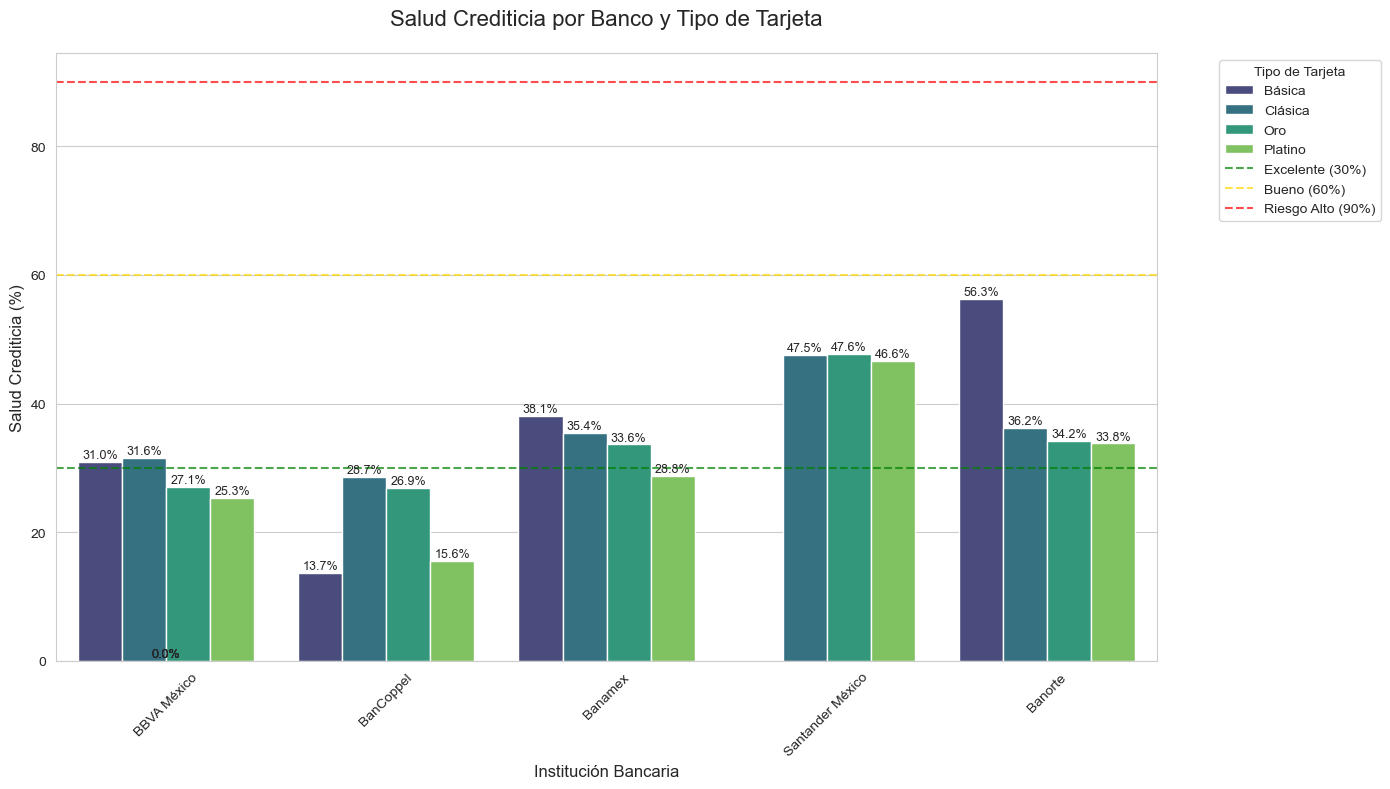

In [ ]:
# Graph the credit health metric
filtered_credit = credit_health_grouped_data[
    credit_health_grouped_data['institutions'].isin(selected_banks)
]

# Create visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create the plot
ax = sns.barplot(
    data=filtered_credit,
    x='institutions',
    y='credit_health_pct',
    hue='credit_card_type',
    palette='viridis',
    ci=None,
    order=selected_banks  # Maintain specified order
)

# Add reference lines
plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Excelente (30%)')
plt.axhline(60, color='gold', linestyle='--', alpha=0.7, label='Bueno (60%)')
plt.axhline(90, color='red', linestyle='--', alpha=0.7, label='Riesgo Alto (90%)')

# Add value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=9
    )

# Customize plot
plt.title('Salud Crediticia por Banco y Tipo de Tarjeta', fontsize=16, pad=20)
plt.ylabel('Salud Crediticia (%)', fontsize=12)
plt.xlabel('Institución Bancaria', fontsize=12)
plt.legend(title='Tipo de Tarjeta', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
participación_msi_data = data.groupby('institutions')['saldo_de_promociones_a_meses_sin_intereses'].sum()
# Order the results
participación_msi_data = participación_msi_data.sort_values(ascending=False)
display(participación_msi_data)
display(participación_msi_data.describe())

institutions
Banamex                1.305261e+12
BBVA México            9.797991e+11
Santander México       4.722660e+11
Banorte                3.025280e+11
HSBC México            2.407742e+11
Banco Invex            1.934700e+11
Scotiabank Inverlat    6.658606e+10
Banco Azteca           6.379998e+10
Banregio               1.772089e+10
Banco del Bajío        1.054599e+10
Banca Afirme           4.517868e+09
BanCoppel              8.678672e+08
Banca Mifel            6.127943e+08
Banco Ualá             4.963991e+05
Banco Actinver         0.000000e+00
Name: saldo_de_promociones_a_meses_sin_intereses, dtype: float64

count    1.500000e+01
mean     2.439167e+11
std      3.955280e+11
min      0.000000e+00
25%      2.692867e+09
50%      6.379998e+10
75%      2.716511e+11
max      1.305261e+12
Name: saldo_de_promociones_a_meses_sin_intereses, dtype: float64

C:\Users\arq_c\AppData\Local\Temp\ipykernel_24376\1059704252.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


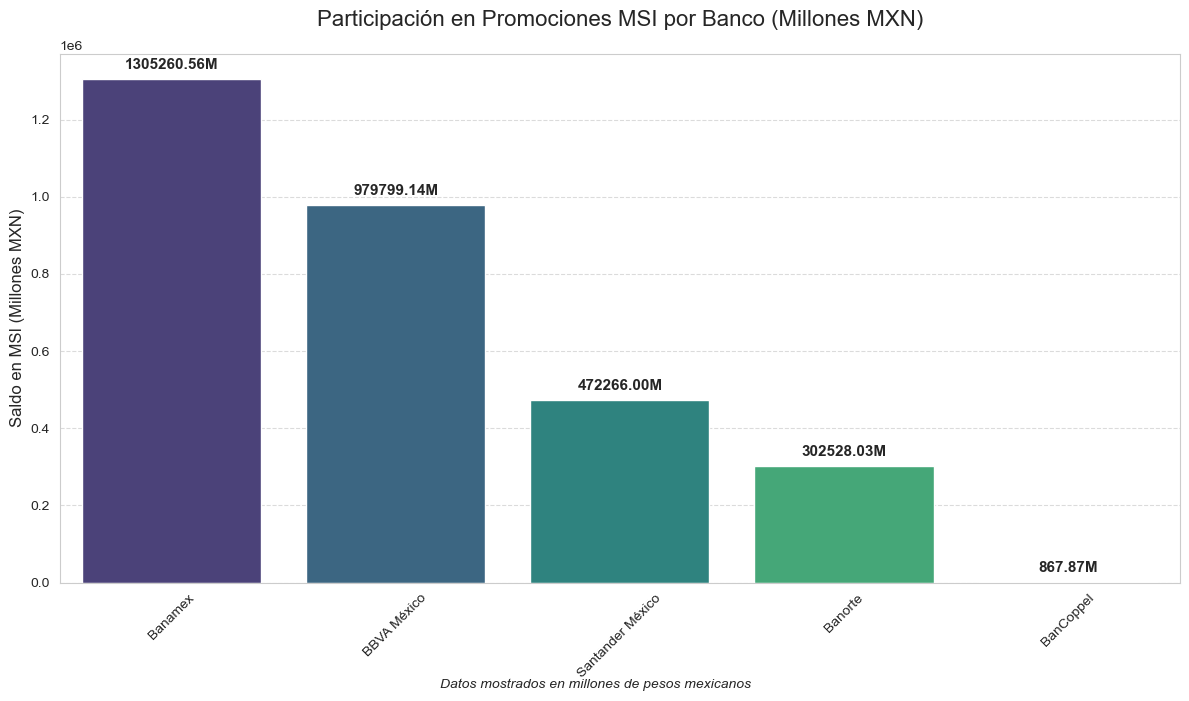

Saldo total en promociones MSI por banco (en millones):
institutions
Banamex             1305260.56
BBVA México          979799.14
Santander México     472266.00
Banorte              302528.03
BanCoppel               867.87
Name: saldo_de_promociones_a_meses_sin_intereses, dtype: float64


In [ ]:
msi_data = data[data['institutions'].isin(selected_banks)].groupby('institutions')['saldo_de_promociones_a_meses_sin_intereses'].sum()

# Convert to millions for better readability
msi_data_millions = msi_data / 1000000  # Convert to millions

# Sort by value (descending)
msi_data_millions = msi_data_millions.sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create bar plot
ax = sns.barplot(
    x=msi_data_millions.index,
    y=msi_data_millions.values,
    palette="viridis",
    order=msi_data_millions.index  # Maintain the sorted order
)

# Add value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}M", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# Customize plot
plt.title('Participación en Promociones MSI por Banco (Millones MXN)', fontsize=16, pad=20)
plt.ylabel('Saldo en MSI (Millones MXN)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add footnote
plt.figtext(0.5, 0.01, 
           "Datos mostrados en millones de pesos mexicanos", 
           ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Display the raw data
print("Saldo total en promociones MSI por banco (en millones):")
print(msi_data_millions.round(2))